In [52]:
import pandas as pd
import os

In [53]:
weather_data = pd.read_csv('weather_timeseries.csv')

In [54]:
#weather_data = weather_data.drop(weather_data.columns[0],axis=1)

In [55]:
covid_data = pd.read_csv('covid_data/covid_19_data.csv')

In [56]:
US_covid_data = covid_data[covid_data['Country/Region']=='US']

In [57]:
US_covid_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
70,71,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
119,120,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
120,121,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
161,162,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
285273,285274,05/02/2021,Virginia,US,2021-05-03 04:20:39,661314.0,10791.0,0.0
285283,285284,05/02/2021,Washington,US,2021-05-03 04:20:39,404709.0,5499.0,0.0
285286,285287,05/02/2021,West Virginia,US,2021-05-03 04:20:39,153918.0,2686.0,0.0
285288,285289,05/02/2021,Wisconsin,US,2021-05-03 04:20:39,661685.0,7567.0,0.0


In [58]:
US_weather_data = weather_data[weather_data['location'].isin(US_covid_data['Province/State'])]
US_covid_data = US_covid_data[US_covid_data['Province/State'].isin(weather_data['location'])]


In [78]:
US_weather_data[US_weather_data['location']=='Kentucky']
US_weather_data.describe()

,Average Temperature (deg F)
count,3331.000000
mean,56.228578
std,14.264214
min,-3.959350
25%,46.000000
50%,56.500000
75%,68.068687
max,84.454545


In [60]:
type(US_weather_data.iloc[0]['date'])

str

In [61]:
type(US_covid_data.iloc[0]['ObservationDate'])

str

In [62]:
US_weather_data['date'] = pd.to_datetime(US_weather_data['date'])

In [63]:
US_weather_data[US_weather_data['location']=='Kentucky'].groupby('date').mean()

,Average Temperature (deg F)
date,
2020-02-01,40.500000
2020-02-02,47.857143
2020-02-03,57.928571
2020-02-04,55.928571
2020-02-05,41.500000
...,...
2020-06-26,75.933333
2020-06-27,74.600000
2020-06-28,72.400000


In [64]:
US_covid_data['ObservationDate'] = pd.to_datetime(US_covid_data['ObservationDate'])

C:\Users\tango\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
US_weather_data = US_weather_data[US_weather_data['date'].isin(US_covid_data['ObservationDate'])]
US_covid_data = US_covid_data[US_covid_data['ObservationDate'].isin(weather_data['date'])]

In [66]:
US_covid_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4591,4592,2020-03-10,Washington,US,2020-03-10T22:13:11,267.0,23.0,1.0
4610,4611,2020-03-10,Massachusetts,US,2020-03-10T22:13:11,92.0,0.0,1.0
4651,4652,2020-03-10,Georgia,US,2020-03-10T03:53:03,17.0,0.0,0.0
4656,4657,2020-03-10,Florida,US,2020-03-10T13:13:14,15.0,2.0,0.0
4657,4658,2020-03-10,New Jersey,US,2020-03-10T18:13:16,15.0,1.0,0.0
...,...,...,...,...,...,...,...,...
54264,54265,2020-06-30,Vermont,US,2021-04-02 15:13:53,1208.0,56.0,0.0
54269,54270,2020-06-30,Virginia,US,2021-04-02 15:13:53,62787.0,1763.0,0.0
54277,54278,2020-06-30,Washington,US,2021-04-02 15:13:53,33439.0,1303.0,0.0
54279,54280,2020-06-30,West Virginia,US,2021-04-02 15:13:53,2905.0,93.0,0.0


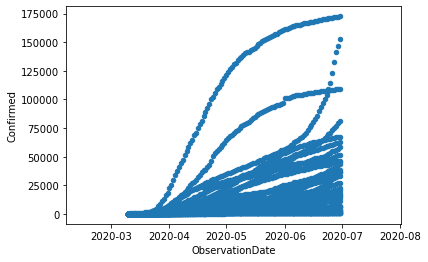

In [67]:
US_covid_data.plot(x='ObservationDate',y='Confirmed',kind='scatter')

In [68]:
US_weather_data_avg = US_weather_data.groupby(['date','location']).mean()
print(US_weather_data)

           date  Average Temperature (deg F)    location     fids
17   2020-03-24                    33.750000  Washington  FIPS:53
18   2020-03-26                    34.111111  Washington  FIPS:53
19   2020-03-27                    38.266667  Washington  FIPS:53
20   2020-03-28                    41.111111  Washington  FIPS:53
21   2020-03-29                    40.583333  Washington  FIPS:53
...         ...                          ...         ...      ...
4423 2020-06-26                    74.538462     Alabama  FIPS:01
4424 2020-06-27                    77.384615     Alabama  FIPS:01
4425 2020-06-28                    81.153846     Alabama  FIPS:01
4426 2020-06-29                    80.230769     Alabama  FIPS:01
4427 2020-06-30                    79.307692     Alabama  FIPS:01

[3331 rows x 4 columns]


In [69]:
US_weather_data_avg

Average Temperature (deg F)
date       location                                  
2020-03-10 Alabama                          61.769231
           Alaska                           -0.570248
           Arkansas                         54.000000
           Connecticut                      53.000000
           Delaware                         58.000000
...                                               ...
2020-06-30 Utah                             52.375000
           Vermont                          67.500000
           Washington                       61.000000
           West Virginia                    73.000000
           Wyoming                          48.421053

[3331 rows x 1 columns]

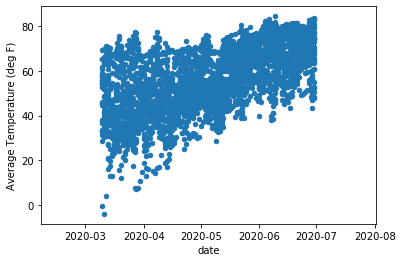

In [76]:
US_weather_data_avg.reset_index().plot(x='date',y='Average Temperature (deg F)',kind='scatter')

In [77]:
US_weather_data.to_csv('clean_weather_data.csv')
US_covid_data.to_csv('clean_covid_data.csv')

In [ ]:
#[TODO]: Get data for remaining 17 states/districts